# Thermostats

In this notebook we'll discuss three thermostats used in molecular-dynamics simulations. They are:

1. The Berendsen thermostat.
2. The Andersen thermostat.
3. The Nosé-Hoover thermostat.

## The Berendsen thermostat

This thermostat is among the simplest to implement, but it suffers from several problems. It is an aggressive thermostat which reduces the deviation to the desired temperature exponentially. This thermostat is unable to preserve consistency with the canonical ensemble.

## The Nosé-Hoover thermostat

The default thermostat in Lammps is the Nosé-Hoover thermostat. This thermostat is able to preserve the canonical ensemble and is therefore seen as the de-facto standard thermostat in molecular dynamics simulations.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [43]:
%%writefile scripts/berendsen.in

# 3d Lennard-Jones gas
units lj
dimension 3
# Periodic boundiaries
boundary p p p
atom_style atomic

lattice fcc 0.01
region simbox block 0 20 0 20 0 20
create_box 1 simbox
create_atoms 1 box

mass 1 1.0
velocity all create ${T} 87287 dist uniform

variable cut equal 3.0
pair_style lj/cut ${cut}
pair_coeff 1 1 1.0 1.0


#fix 1 all nvt temp ${T} ${T_bath} 1.0
fix 1 all nve
fix 2 all temp/berendsen ${T} ${T_bath} 1.0

dump 1 all custom 10 dat/berendsen_${feature}.lammpstrj id type x y z vx vy vz
log dat/berendsen_${feature}.log
thermo 100
run 15000

Overwriting scripts/berendsen.in


In [44]:
%%writefile scripts/nosehoover.in

# 3d Lennard-Jones gas
units lj
dimension 3
# Periodic boundiaries
boundary p p p
atom_style atomic

lattice fcc 0.01
region simbox block 0 20 0 20 0 20
create_box 1 simbox
create_atoms 1 box

mass 1 1.0
velocity all create ${T} 87287 dist uniform

variable cut equal 3.0
pair_style lj/cut ${cut}
pair_coeff 1 1 1.0 1.0


fix 1 all nvt temp ${T} ${T_bath} 1.0
#fix 1 all nve
#fix 2 all temp/berendsen ${T} ${T_bath} 1.0

dump 1 all custom 10 dat/nosehoover_${feature}.lammpstrj id type x y z vx vy vz
log dat/nosehoover_${feature}.log
thermo 100
run 15000

Overwriting scripts/nosehoover.in


In [46]:
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp \
        -var T 0.1 \
        -var T_bath 10.0 \
        -var feature heating \
        -in scripts/berendsen.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp \
        -var T 0.1 \
        -var T_bath 10.0 \
        -var feature heating \
        -in scripts/nosehoover.in

LAMMPS (4 Jan 2019)
  using 4 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 7.36806 7.36806 7.36806
Created orthogonal box = (0 0 0) to (147.361 147.361 147.361)
  1 by 2 by 2 MPI processor grid
Created 32000 atoms
  Time spent = 0.00191324 secs
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 3.3
  ghost atom cutoff = 3.3
  binsize = 1.65, bins = 90 90 90
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 8.49 | 8.49 | 8.49 Mbytes
Step Temp E_pair E_mol TotEng Press 
       0          0.1            0            0   0.14999531 0.00099996875 
     100   0.11422189            0  

    9800    6.4349479 -0.041932024            0    9.6101881  0.064913138 
    9900    6.5003183 -0.041082017            0    9.7090907  0.065813569 
   10000    6.5678288 -0.043319676            0    9.8081156  0.066195205 
   10100     6.634521 -0.043758661            0    9.9077118  0.066922984 
   10200    6.7013719 -0.044865384            0    10.006878  0.067520809 
   10300    6.7662257 -0.042822592            0    10.106199   0.06824563 
   10400    6.8324171 -0.042991776            0    10.205314  0.068874044 
   10500    6.8980599 -0.041548731            0    10.305218  0.069568216 
   10600    6.9667829 -0.045512354            0    10.404335  0.070078276 
   10700    7.0317708 -0.044299134            0    10.503027  0.070772989 
   10800    7.0965573 -0.041935228            0    10.602568  0.071554263 
   10900    7.1641029 -0.043764221            0    10.702054  0.072065121 
   11000    7.2308017  -0.04481313            0     10.80105  0.072803768 
   11100    7.2940953 -0.

    3100    2.1428953 -0.056594937            0    3.1576475  0.021360248 
    3200    2.2213602 -0.057301107            0    3.2746351  0.022148429 
    3300    2.2874262   -0.0578799            0    3.3731521  0.022711574 
    3400    2.3444518 -0.057473302            0    3.4590945  0.023367733 
    3500    2.3981342 -0.056399066            0    3.5406898  0.023932357 
    3600     2.454977 -0.055684323            0    3.6266661  0.024585712 
    3700    2.5194321 -0.056531411            0    3.7224987  0.025055635 
    3800     2.590994 -0.058433397            0    3.8279361  0.025782846 
    3900    2.6631568 -0.056688819            0    3.9379215  0.026685555 
    4000    2.7371491 -0.058361342            0    4.0472341  0.027335807 
    4100    2.8061424 -0.057116589            0    4.1519655  0.027978092 
    4200    2.8722176 -0.056850787            0     4.251341  0.028640614 
    4300    2.9348517 -0.055587152            0    4.3465528  0.029336364 
    4400    2.9962821 -0.

   14100    9.4042336 -0.036795167            0    14.069114  0.094919025 
   14200    9.4667387  -0.03459096            0    14.165073  0.095640179 
   14300    9.5329228 -0.034279005            0    14.264658  0.096344498 
   14400    9.6012461 -0.033586073            0    14.367833  0.097057048 
   14500    9.6716253 -0.033663556            0    14.473321  0.097726647 
   14600    9.7446651 -0.039492932            0    14.577048  0.098210209 
   14700    9.8086436 -0.035359352            0    14.677146  0.099057466 
   14800    9.8748475 -0.038355694            0    14.773453  0.099485134 
   14900    9.9339979 -0.033316826            0    14.867214   0.10046193 
   15000    9.9963267 -0.032769321            0    14.961252   0.10095832 
Loop time of 51.1097 on 16 procs for 15000 steps with 32000 atoms

Performance: 126786.172 tau/day, 293.487 timesteps/s
89.0% CPU use with 4 MPI tasks x 4 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%var

In [53]:
log_df_nh_heating = pd.read_csv("dat/nosehoover_heating.log", sep=r"\s+", skiprows=15, skipfooter=27, engine="python")
log_df_b_heating = pd.read_csv("dat/berendsen_heating.log", sep=r"\s+", skiprows=15, skipfooter=27, engine="python")

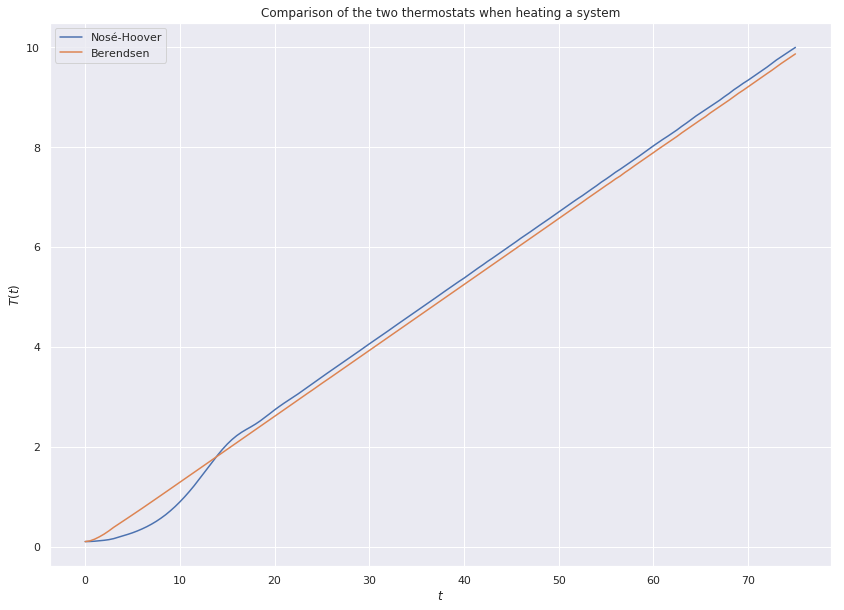

In [54]:
fig = plt.figure(figsize=(14, 10))

plt.plot(log_df_nh_heating["Step"] * 0.005, log_df_nh_heating["Temp"], label=r"Nosé-Hoover")
plt.plot(log_df_b_heating["Step"] * 0.005, log_df_b_heating["Temp"], label=r"Berendsen")
plt.legend(loc="best")
plt.xlabel(r"$t$")
plt.ylabel(r"$T(t)$")
plt.title(r"Comparison of the two thermostats when heating a system")
plt.show()

In this figure we can see how both thermostats perform in time when heating up a system. The Nosé-Hoover allows for some fluctuations, whereas the Berendsen thermostat pushes the system to the desired temperature linearly.

In [49]:
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp \
        -var T 10.0 \
        -var T_bath 10.0 \
        -var feature constant \
        -in scripts/berendsen.in
!export OMP_NUM_THREADS=4 && \
    mpirun -np 4 lmp \
        -var T 10.0 \
        -var T_bath 10.0 \
        -var feature constant \
        -in scripts/nosehoover.in

LAMMPS (4 Jan 2019)
  using 4 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 7.36806 7.36806 7.36806
Created orthogonal box = (0 0 0) to (147.361 147.361 147.361)
  1 by 2 by 2 MPI processor grid
Created 32000 atoms
  Time spent = 0.00162333 secs
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 3.3
  ghost atom cutoff = 3.3
  binsize = 1.65, bins = 90 90 90
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 8.49 | 8.49 | 8.49 Mbytes
Step Temp E_pair E_mol TotEng Press 
       0           10            0            0    14.999531  0.099996875 
     100    10.006112  -0.01073202   

    9800    9.9991437 -0.032134045            0    14.966113   0.10106484 
    9900    9.9998276 -0.032913183            0    14.966359   0.10108602 
   10000    9.9942282 -0.024405015            0    14.966469   0.10141044 
   10100    9.9993738 -0.032102611            0    14.966489   0.10102551 
   10200    10.000178 -0.033198516            0      14.9666   0.10103745 
   10300    10.000153 -0.033570888            0    14.966191   0.10096439 
   10400     9.998592 -0.031524073            0    14.965895   0.10121593 
   10500    9.9981626 -0.031263544            0    14.965512   0.10104386 
   10600    10.003279 -0.038299445            0    14.966151   0.10083206 
   10700    10.001501 -0.035757701            0    14.966025   0.10090731 
   10800    10.005551 -0.042066875            0    14.965791   0.10066303 
   10900    9.9999927 -0.033977891            0    14.965542   0.10090066 
   11000     9.999103 -0.031958268            0    14.966228   0.10106672 
   11100    9.9961847 -0.

    3100    9.9511614 -0.032456085            0     14.89382   0.10062921 
    3200     9.934538 -0.036600288            0    14.864741   0.10031157 
    3300    9.9471115 -0.033062727            0    14.887138   0.10046735 
    3400    9.9842229 -0.034195173            0    14.941671   0.10091746 
    3500    10.020812 -0.034672412            0    14.996076   0.10119122 
    3600    10.038136 -0.033950832            0    15.022782   0.10135314 
    3700    10.035973 -0.035396122            0    15.018092   0.10137782 
    3800    10.012736 -0.026841303            0    14.991794   0.10150013 
    3900    9.9949567  -0.03239451            0    14.959572   0.10100976 
    4000    9.9820575 -0.033654956            0    14.938963   0.10088817 
    4100    9.9809136 -0.034061682            0    14.936841   0.10080991 
    4200    9.9856458 -0.033431684            0    14.944569   0.10083042 
    4300    9.9914854 -0.032222016            0    14.954538   0.10102062 
    4400    9.9991169 -0.

   14100    9.9733496 -0.036069832            0    14.923487   0.10071651 
   14200    10.021027 -0.034010251            0    14.997061   0.10131379 
   14300    10.100087 -0.038324528            0    15.111333   0.10178984 
   14400    10.121575 -0.039082838            0    15.142805   0.10195663 
   14500    10.085797 -0.034108719            0    15.094114   0.10186091 
   14600    10.040468 -0.034919977            0    15.025311   0.10138219 
   14700    10.003911 -0.027761294            0    14.977636   0.10141757 
   14800    9.9860245 -0.031260038            0    14.947309   0.10105763 
   14900    9.9793418 -0.036816469            0    14.931728   0.10073042 
   15000    9.9789521 -0.035034385            0    14.932926   0.10067989 
Loop time of 58.031 on 16 procs for 15000 steps with 32000 atoms

Performance: 111664.478 tau/day, 258.483 timesteps/s
86.5% CPU use with 4 MPI tasks x 4 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%vara

In [56]:
log_df_nh_constant = pd.read_csv("dat/nosehoover_constant.log", sep=r"\s+", skiprows=15, skipfooter=27, engine="python")
log_df_b_constant = pd.read_csv("dat/berendsen_constant.log", sep=r"\s+", skiprows=15, skipfooter=27, engine="python")

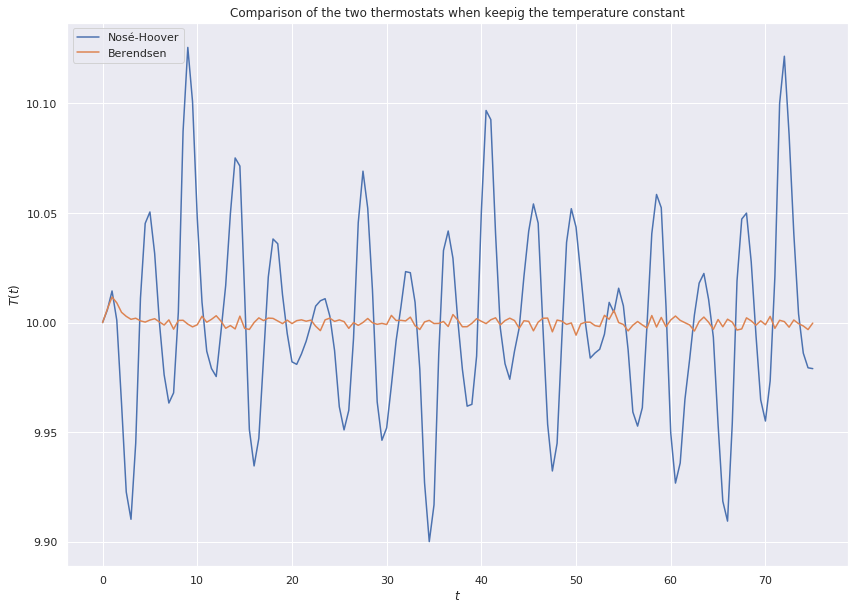

In [57]:
fig = plt.figure(figsize=(14, 10))

plt.plot(log_df_nh_constant["Step"] * 0.005, log_df_nh_constant["Temp"], label=r"Nosé-Hoover")
plt.plot(log_df_b_constant["Step"] * 0.005, log_df_b_constant["Temp"], label=r"Berendsen")
plt.legend(loc="best")
plt.xlabel(r"$t$")
plt.ylabel(r"$T(t)$")
plt.title(r"Comparison of the two thermostats when keepig the temperature constant")
plt.show()

In the figure above we see how the Nosé-Hoover thermostat alllows for some slack in the temperature.